In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Load the dataset (MNIST)
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [4]:
# Normalize pixel values to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:


# One-hot encoding for labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Build the CNN model
model = Sequential()


In [8]:

# Add MaxPooling layer with 2x2 pooling size
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
# Add Dropout to prevent overfitting
model.add(Dropout(0.25))



In [10]:

# Add another Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout
model.add(Dropout(0.25))

In [11]:

# Add Dropout
model.add(Dropout(0.25))

In [12]:
# Flatten the data to feed it into fully connected layers
model.add(Flatten())

In [13]:
# Add Dense (fully connected) layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))



In [14]:

# Add Dropout
model.add(Dropout(0.5))

# Output layer with 10 neurons for the 10 classes, softmax activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)



Epoch 1/10
300/300 - 26s - 86ms/step - accuracy: 0.7186 - loss: 0.8398 - val_accuracy: 0.9547 - val_loss: 0.1601
Epoch 2/10
300/300 - 12s - 41ms/step - accuracy: 0.9139 - loss: 0.2810 - val_accuracy: 0.9723 - val_loss: 0.0920
Epoch 3/10
300/300 - 12s - 41ms/step - accuracy: 0.9348 - loss: 0.2128 - val_accuracy: 0.9780 - val_loss: 0.0718
Epoch 4/10
300/300 - 12s - 39ms/step - accuracy: 0.9454 - loss: 0.1786 - val_accuracy: 0.9807 - val_loss: 0.0611
Epoch 5/10
300/300 - 13s - 44ms/step - accuracy: 0.9534 - loss: 0.1549 - val_accuracy: 0.9837 - val_loss: 0.0512
Epoch 6/10
300/300 - 18s - 59ms/step - accuracy: 0.9568 - loss: 0.1409 - val_accuracy: 0.9855 - val_loss: 0.0458
Epoch 7/10
300/300 - 20s - 67ms/step - accuracy: 0.9596 - loss: 0.1347 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 8/10
300/300 - 12s - 41ms/step - accuracy: 0.9634 - loss: 0.1233 - val_accuracy: 0.9868 - val_loss: 0.0408
Epoch 9/10
300/300 - 14s - 46ms/step - accuracy: 0.9655 - loss: 0.1148 - val_accuracy: 0.9885 - 

In [17]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9884


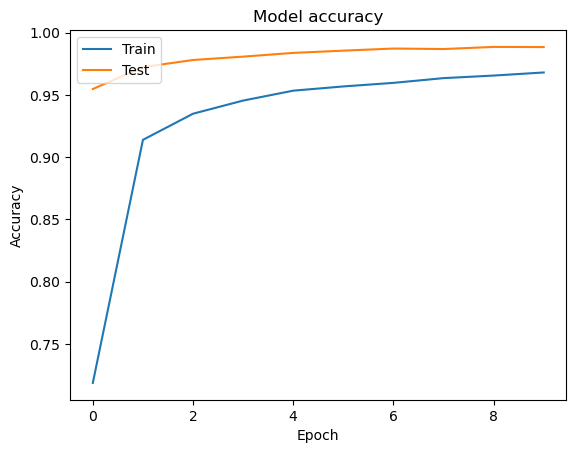

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

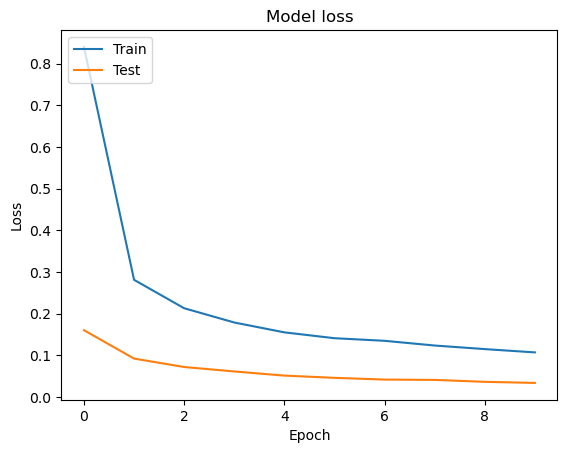

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:
# Make predictions
predictions = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [21]:
# Visualize predictions
def plot_sample(X, y, predictions, index):
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y[index])}, Predicted: {np.argmax(predictions[index])}")
    plt.show()

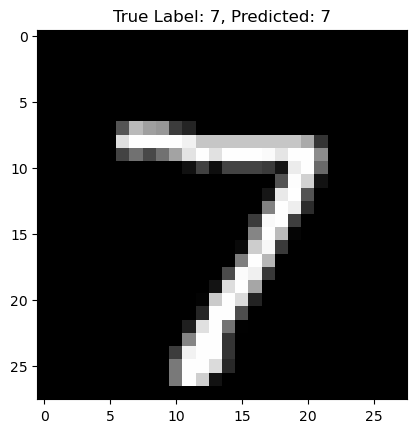

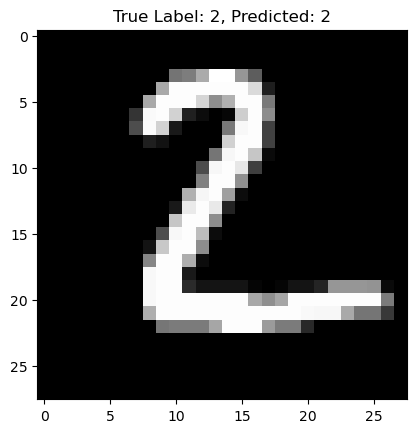

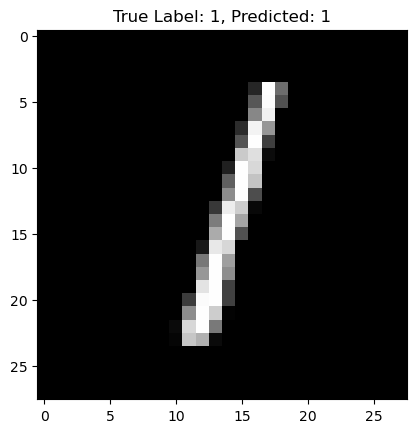

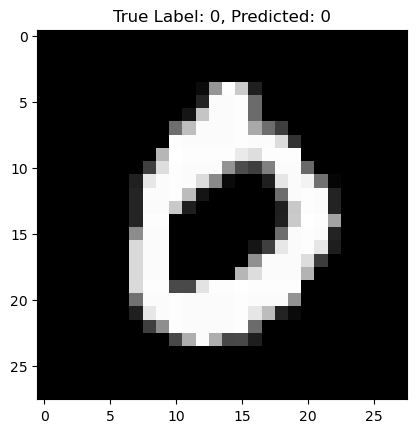

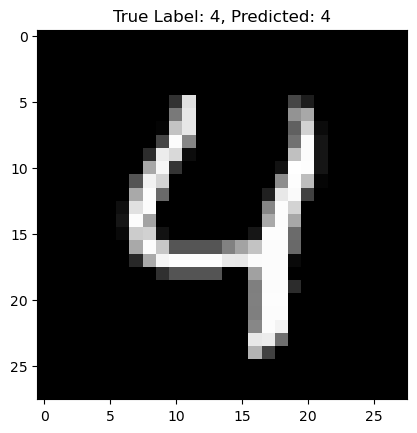

In [22]:
# Plot a few sample predictions
for i in range(5):
    plot_sample(X_test, y_test, predictions, i)